In [261]:
import igraph as ig
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [262]:
#Data Cleaning with the Final Coding.csv file, rows here are tweets

df = pd.read_csv("/Users/rachelroca/Documents/GitHub/disruptjmm/data cleaning/Final Coding.csv",keep_default_na=False)
#The codes were in 5 different columns; lets aggregate them into a new column
df["all codes"] = df[["SO code","BC code","BtC code","CCM code","SJEDI code"]].agg(';'.join,axis=1)
#We separated them by ;, so convert to an array 
df["all codes"] = df["all codes"].apply(lambda s: s.split(';'))
#Strip out leading/trailing spaces
df["all codes"] = df["all codes"].apply(lambda s: [t.strip() for t in s if t])
#Sort the arrays, so we can be confident the same things are not listed in two different ways
df["all codes"] = np.array(df["all codes"].apply(sorted))
df


,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
0,1,1217856519670288384,mathyadriana,Anyone feel like looking through the list of i...,2020-01-16T17:09:55.000Z,1217856519670288384,en,False,776450766710136832,Twitter for iPhone,...,1,talk support,0,,0,,1,bipoc; lgbtq; gender,DL,"[bipoc, gender, lgbtq, talk support]"
1,5,1217856052579971073,mathprofcarrie,"""If you think that your right to speech is mor...",2020-01-16T17:08:04.000Z,1217856052579971073,en,False,31611970,Twitter for Android,...,1,talk support,1,influencers,0,,1,representation,RR,"[amplification, influencers, representation, t..."
2,8,1217855474479046656,pwr2dppl,I ran at elevation to make it to @xl772's #Dis...,2020-01-16T17:05:46.000Z,1217855474479046656,en,False,3308531970,Twitter for Android,...,1,talk support; thankful,0,,0,,0,,JH,"[amplification, talk support, thankful]"
3,9,1217854597747875840,mathprofcarrie,@WanderingPoint @xl772 @pwr2dppl Here!!! #disr...,2020-01-16T17:02:17.000Z,1217850650438049797,en,False,31611970,Twitter for Android,...,1,talk support; emotional support,0,,0,,0,,DL,"[emotional support, talk support]"
4,10,1217852288385024000,mathprofcarrie,@xl772 @pwr2dppl Where and what? - let's get t...,2020-01-16T16:53:06.000Z,1217850650438049797,en,False,31611970,Twitter for Android,...,1,BC impact; talk support,0,,0,,0,,RR,"[BC impact, talk support]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,1124,1218635813027602432,malagonmath,RT @mathprofcarrie: AMS-AWM invited session on...,2020-01-18T20:46:33.000Z,1218635813027602432,en,False,708028111540133888,Twitter for iPhone,...,1,talk support,0,,1,humanize,1,gender,,"[gender, humanize, talk support]"
1125,1125,1218635334251999232,noellebeckman,RT @mathprofcarrie: AMS-AWM invited session on...,2020-01-18T20:44:39.000Z,1218635334251999232,en,False,1660843818,Twitter for iPhone,...,1,talk support,0,,1,humanize,1,gender,,"[gender, humanize, talk support]"
1126,1127,1218632621162483713,MarissaKawehi,RT @matthematician: “[C]arry some of this weig...,2020-01-18T20:33:52.000Z,1218632621162483713,en,False,969876723922808832,Twitter for Android,...,1,talk support,0,,1,allyship in math,1,gender,,"[allyship in math, amplification, gender, talk..."
1127,1128,1218630899404640256,numberdance,RT @sbagley: Kelly MacArthur now speaking abou...,2020-01-18T20:27:02.000Z,1218630899404640256,en,False,961503306,Twitter Web App,...,1,talk support,1,hashtags; influencers,1,math practice; humanize,0,,,"[amplification, hashtags, humanize, influencer..."


In [263]:
tweeters = df['user_username'].unique()
codes = ['advocacy', 'amplification', 'emotional support', 'gender', 'indigenous', 'jmm experience', 'representation', 'bipoc', 'hashtags', 'influencers', 'power', 'talk support', 'humanize', 'math practice', 'current events', 'lgbtq', 'strategic planning', 'allyship in math', 'math experience', 'conversation', 'thankful', 'BC impact', 'disrupteverything', 'SJEDI impact', 'SO impact', 'belonging', 'learning', 'troll', 'CC impact', 'virtual participation', 'activation', 'futures', 'economic', 'beyond', 'celebration']


In [264]:
#transforming the dataframe, so that each row is a tweeter, and the columns are the codes that they tweeted/retweeted/quote tweeted
df_codes = pd.DataFrame(columns = codes)
num_tweets_retweets = np.zeros(len(tweeters))
for i in range(len(tweeters)):
    df_temp = df[df['user_username'] == tweeters[i]]
    num_tweets_retweets[i] = df_temp['tweet_id'].count()
    #sum the all codes column
    codes_sum_temp = df_temp['all codes'].sum()
    #make a dictionary of the codes and how many times they appear in codes_sum_temp
    codes_dict_temp = {i:codes_sum_temp.count(i) for i in codes}
    #make the dictionary a dataframe
    codes_dict_temp_df = pd.DataFrame.from_dict([codes_dict_temp])
    #add the dictionary to the dataframe
    df_codes = pd.concat([df_codes,codes_dict_temp_df], ignore_index=True)
#make the indices the tweeters' names
df_codes.index = tweeters
df_codes

,advocacy,amplification,emotional support,gender,indigenous,jmm experience,representation,bipoc,hashtags,influencers,...,belonging,learning,troll,CC impact,virtual participation,activation,futures,economic,beyond,celebration
mathyadriana,1,6,1,2,1,2,5,2,3,2,...,0,1,0,0,0,0,0,0,0,0
mathprofcarrie,7,69,3,11,14,2,25,11,47,33,...,4,6,0,2,1,1,1,1,0,0
pwr2dppl,8,51,7,8,12,6,20,12,39,28,...,5,1,0,2,0,1,0,0,0,0
xl772,2,6,1,1,2,1,6,0,3,4,...,0,0,0,0,0,0,0,0,0,0
WanderingPoint,1,11,3,1,4,2,6,1,8,5,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
superyarn,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dbdoughe,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cordesm,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f_futamura,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [265]:
#make the dataframe into a numpy array
df_codes_array = df_codes.to_numpy()
df_codes_array=df_codes_array.astype('i')
df_codes_array

array([[ 1,  6,  1, ...,  0,  0,  0],
       [ 7, 69,  3, ...,  1,  0,  0],
       [ 8, 51,  7, ...,  0,  0,  0],
       ...,
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [266]:
#putting the codes into the umbrella themes
SO_codes = ['amplification', 'SO impact', 'activation', 'strategic planning', 'troll']
BC_codes = ['thankful', 'talk support', 'belonging', 'emotional support', 'conversation', 'celebration', 'BC impact']
BCP_codes = ['disrupteverything', 'influencers', 'hashtags', 'virtual participation']
CC_codes = ['humanize', 'jmm experience', 'math experience', 'futures', 'math practice', 'current events', 'allyship in math', 'CC impact']
SJEDI_codes = ['representation', 'lgbtq', 'bipoc', 'gender',  'indigenous', 'power', 'advocacy', 'learning', 'economic', 'SJEDI impact']

Text(0, 0.5, 'Number of tweets/retweets')

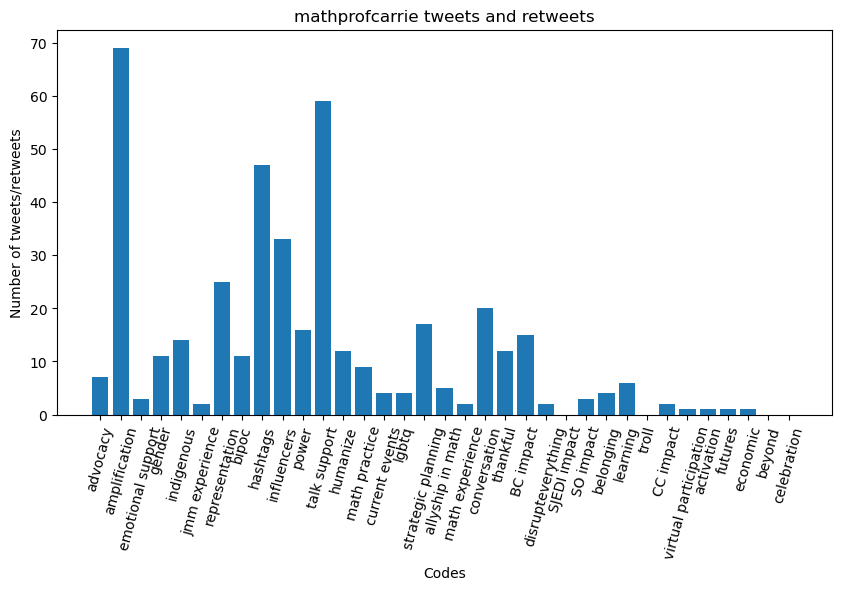

In [267]:
#code for producing distribution of codes for a specific tweeter
plt.figure(figsize=(10,5))
plt.bar(codes, df_codes.loc['mathprofcarrie'])
plt.xticks(rotation=75, fontsize=10)
plt.title('mathprofcarrie tweets and retweets')
plt.xlabel('Codes')
plt.ylabel('Number of tweets/retweets')

In [268]:
#sum up all the columns in SO_codes, BC_codes, BCP_codes, CC_codes, and SJEDI_codes for each tweeter
df_codes['SO_codes'] = df_codes[SO_codes].sum(axis=1)
df_codes['BC_codes'] = df_codes[BC_codes].sum(axis=1)
df_codes['BCP_codes'] = df_codes[BCP_codes].sum(axis=1)
df_codes['CC_codes'] = df_codes[CC_codes].sum(axis=1)
df_codes['SJEDI_codes'] = df_codes[SJEDI_codes].sum(axis=1)

df_codes

,advocacy,amplification,emotional support,gender,indigenous,jmm experience,representation,bipoc,hashtags,influencers,...,activation,futures,economic,beyond,celebration,SO_codes,BC_codes,BCP_codes,CC_codes,SJEDI_codes
mathyadriana,1,6,1,2,1,2,5,2,3,2,...,0,0,0,0,0,8,9,5,5,14
mathprofcarrie,7,69,3,11,14,2,25,11,47,33,...,1,1,1,0,0,90,113,83,37,95
pwr2dppl,8,51,7,8,12,6,20,12,39,28,...,1,0,0,0,0,73,84,67,40,84
xl772,2,6,1,1,2,1,6,0,3,4,...,0,0,0,0,0,10,8,7,3,13
WanderingPoint,1,11,3,1,4,2,6,1,8,5,...,0,0,0,0,0,14,18,13,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
superyarn,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,4
dbdoughe,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,4
cordesm,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,4
f_futamura,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,4


In [269]:
#Checking to make sure the sum is doing what we want
#'disrupteverything', 'influencers', 'hashtags', 'virtual participation'
df_codes.loc['mathprofcarrie', 'disrupteverything'] + df_codes.loc['mathprofcarrie', 'influencers'] + df_codes.loc['mathprofcarrie', 'hashtags'] + df_codes.loc['mathprofcarrie', 'virtual participation']



83

## Clusters from Mapper (interval = 1)

In [270]:
#getting the filter function
def l1_norm(X):
    #take the l1 norm of each row
    return np.linalg.norm(X, ord=1, axis=1).reshape(-1, 1)

def linf_norm(X):
    #take the l1 norm of each row
    return np.linalg.norm(X, ord=np.inf, axis=1).reshape(-1, 1)

from sklearn.preprocessing import FunctionTransformer
l1_norm_trans = FunctionTransformer(l1_norm)

linf_norm_trans = FunctionTransformer(linf_norm)

In [271]:
import gtda.mapper as map
import sklearn.cluster as cluster


filter_func = l1_norm_trans
cover = map.OneDimensionalCover(kind='uniform', n_intervals=10, overlap_frac=0.35)
clusterer = cluster.DBSCAN()

pipe = map.make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=None,
    verbose=False,
    n_jobs=1,
)

fig = map.plot_static_mapper_graph(pipe, df_codes_array)
fig.show(config={'scrollZoom': True})



In [272]:
#remember these are people
graph = pipe.fit_transform(df_codes_array)
graph.vs.attributes()
node_elts = graph.vs["node_elements"]
node_elts

[array([  0,   3,   6,   7,   8,   9,  10,  11,  12,  13,  15,  16,  17,
         20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
         33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         72,  73,  74,  75,  76,  77,  79,  80,  82,  83,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 103,
        106, 108, 109, 111, 113, 114, 117, 122, 125, 128, 131, 132, 134,
        135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150,
        151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
        164, 165, 166, 168, 169, 170, 175, 177, 178, 180, 181, 182, 183,
        184, 185, 186, 187, 188, 190, 193, 202, 203, 204, 206, 211, 214,
        216, 217, 220, 223, 224, 237, 238, 239, 240, 241, 242, 243, 244,
        245, 246, 247, 248, 249, 250, 251, 252, 253

In [273]:
#looking at the different clusters - remember each cluster contains people!

#get these rows from df_codes
cluster0 = node_elts[0]

#add normal index
df_codes_clusters = df_codes.reset_index(drop=False)
df_cluster0 = df_codes_clusters.iloc[cluster0]
cluster0_code_sum = df_cluster0.iloc[:,1:-5].sum()
df_cluster0

#tweeters[cluster0] == df_cluster0['index'].to_numpy()


,index,advocacy,amplification,emotional support,gender,indigenous,jmm experience,representation,bipoc,hashtags,...,activation,futures,economic,beyond,celebration,SO_codes,BC_codes,BCP_codes,CC_codes,SJEDI_codes
0,mathyadriana,1,6,1,2,1,2,5,2,3,...,0,0,0,0,0,8,9,5,5,14
3,xl772,2,6,1,1,2,1,6,0,3,...,0,0,0,0,0,10,8,7,3,13
6,qsideinstitute,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,frontLahn,1,3,0,0,0,0,2,0,4,...,0,0,0,0,0,5,2,7,1,7
8,RachelleDeCoste,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,sajinkoroth,2,4,1,2,1,1,1,0,1,...,0,0,0,0,0,4,3,3,3,7
316,JasonWilliamsNY,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
318,ONUMathStat,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
321,cjp_still,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1


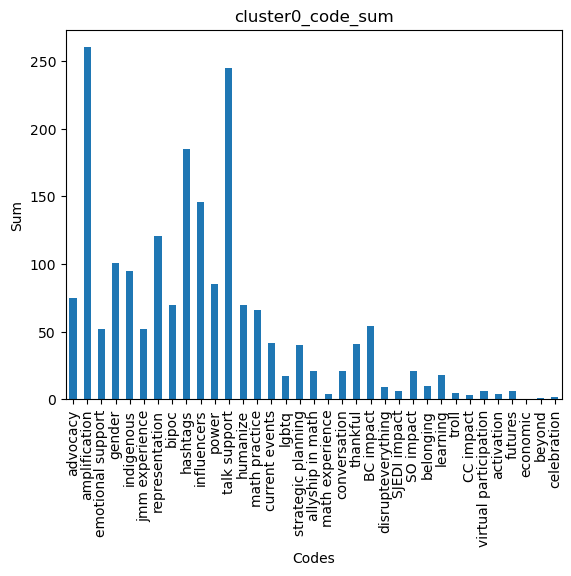

In [274]:
#plotting codes for cluster 0
cluster0_code_sum.plot(kind='bar')
plt.xlabel('Codes')
plt.ylabel('Sum')
plt.title('cluster0_code_sum')
plt.show()

Text(0.5, 1.0, 'cluster0_themes')

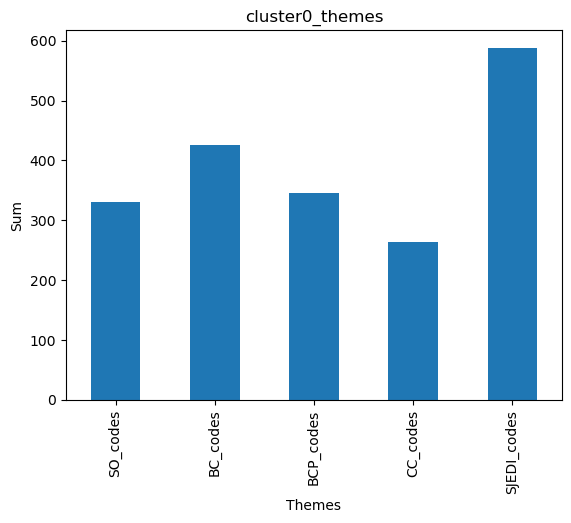

In [275]:
#plotting themes for cluster 0
cluster0_themes = df_cluster0.iloc[:,-5:].sum()
cluster0_themes.plot(kind='bar')
plt.xlabel('Themes')
plt.ylabel('Sum')
plt.title('cluster0_themes')

In [276]:
#looking at all the tweets/retweets/quote tweets for the people in cluster 0
df[df['user_username'].isin(df_cluster0['index'].values)]

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
0,1,1217856519670288384,mathyadriana,Anyone feel like looking through the list of i...,2020-01-16T17:09:55.000Z,1217856519670288384,en,False,776450766710136832,Twitter for iPhone,...,1,talk support,0,,0,,1,bipoc; lgbtq; gender,DL,"[bipoc, gender, lgbtq, talk support]"
5,12,1217850650438049797,xl772,I’m about to #DisruptJMM in a very small way a...,2020-01-16T16:46:36.000Z,1217850650438049797,en,False,1260729972,Twitter for iPhone,...,1,talk support; thankful,1,influencers,0,,0,,JH,"[SO impact, amplification, influencers, talk s..."
10,53,1217757336254799878,qsideinstitute,Anyone at @JointMath working to #DisruptJMM: B...,2020-01-16T10:35:48.000Z,1217757336254799878,en,False,1116406303298084867,Twitter Web App,...,1,BC impact,0,,0,,1,advocacy,RR,"[BC impact, advocacy]"
11,62,1217681818268459009,frontLahn,"If you're at #JMM2020, come to this panel on s...",2020-01-16T05:35:43.000Z,1217681818268459009,en,False,2612970471,Twitter Web App,...,1,talk support,0,,0,,1,lgbtq,JH,"[amplification, lgbtq, talk support]"
13,73,1217647255571689473,RachelleDeCoste,@LoboWithACause Thank you for sharing this thi...,2020-01-16T03:18:23.000Z,1217126843549011969,en,False,2780850314,Twitter for Android,...,1,thankful,0,,1,CC impact,1,SJEDI impact,RR,"[CC impact, SJEDI impact, SO impact, thankful]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1120,1218643230159462402,Mathy_Jessica,RT @joshlaison: I love what people are doing t...,2020-01-18T21:16:02.000Z,1218643230159462402,en,False,451195572,Twitter for iPhone,...,1,thankful,0,,0,,0,,,[thankful]
1124,1124,1218635813027602432,malagonmath,RT @mathprofcarrie: AMS-AWM invited session on...,2020-01-18T20:46:33.000Z,1218635813027602432,en,False,708028111540133888,Twitter for iPhone,...,1,talk support,0,,1,humanize,1,gender,,"[gender, humanize, talk support]"
1125,1125,1218635334251999232,noellebeckman,RT @mathprofcarrie: AMS-AWM invited session on...,2020-01-18T20:44:39.000Z,1218635334251999232,en,False,1660843818,Twitter for iPhone,...,1,talk support,0,,1,humanize,1,gender,,"[gender, humanize, talk support]"
1126,1127,1218632621162483713,MarissaKawehi,RT @matthematician: “[C]arry some of this weig...,2020-01-18T20:33:52.000Z,1218632621162483713,en,False,969876723922808832,Twitter for Android,...,1,talk support,0,,1,allyship in math,1,gender,,"[allyship in math, amplification, gender, talk..."


In [277]:
#check that a specific user exists in the cluster

'JointMath' in df_cluster0['index'].values

False

In [278]:
#Checking that everyone outside of cluster 0 only has 1 retweet
cluster0 = node_elts[0]
cluster1 = node_elts[1]
cluster2 = node_elts[2]
cluster3 = node_elts[3]
cluster4 = node_elts[4]
cluster5 = node_elts[5]
cluster6 = node_elts[6]
cluster7 = node_elts[7]

for i in tweeters[cluster4]:
    if df[df['user_username'] == i]['tweet_id'].count() != 1:
        print("ALERT")   

#check that every tweeter appears in a cluster
for i in tweeters:
    if i not in df_codes_clusters['index'].values:
        print("ALERT")

ALERT


In [279]:
df[df['user_username'] == "MarissaKawehi"]

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
20,106,1217492198545031169,MarissaKawehi,Very happy for folks like @mathyadriana @monso...,2020-01-15T17:02:14.000Z,1217492198545031169,en,False,969876723922808832,Twitter for Android,...,1,thankful; talk support,1,influencers; virtual participation,0,,0,,JH,"[influencers, talk support, thankful, virtual ..."
180,607,1217896369525903360,MarissaKawehi,#DisruptJMM #JMM https://t.co/uUyz4QYdZf,2020-01-16T19:48:16.000Z,1217896369525903360,und,False,969876723922808832,Twitter Web App,...,0,,0,,0,,0,,DL,[amplification]
212,720,1347304477867597826,MarissaKawehi,I'm glad you enjoyed it! I got so nervous with...,2021-01-07T22:09:53.000Z,1347304477867597826,en,False,969876723922808832,Twitter Web App,...,1,talk support; conversation,1,influencers,0,,1,learning,JH,"[amplification, conversation, influencers, lea..."
213,724,1347304100711571456,MarissaKawehi,Just asking a fundamental mathematical questio...,2021-01-07T22:08:23.000Z,1347304100711571456,en,False,969876723922808832,Twitter Web App,...,1,talk support,0,,1,current events,1,bipoc; power,DL,"[bipoc, current events, power, talk support]"
335,46,1217786281918377985,MarissaKawehi,"RT @frontLahn: If you're at #JMM2020, come to ...",2020-01-16T12:30:49.000Z,1217786281918377985,en,False,969876723922808832,Twitter for Android,...,1,talk support,0,,0,,1,lgbtq,,"[amplification, lgbtq, talk support]"
522,308,1218551665357467652,MarissaKawehi,RT @WanderingPoint: Here it is. #DisruptJMM ht...,2020-01-18T15:12:11.000Z,1218551665357467652,en,False,969876723922808832,Twitter for Android,...,1,emotional support,0,,1,jmm experience,1,gender; indigenous; advocacy; representation,,"[advocacy, amplification, emotional support, g..."
608,418,1218244497458393089,MarissaKawehi,RT @pwr2dppl: At #JMM2020 people think I'm wea...,2020-01-17T18:51:36.000Z,1218244497458393089,en,False,969876723922808832,Twitter Web App,...,1,BC impact,1,hashtags,0,,1,indigenous,,"[BC impact, hashtags, indigenous]"
708,583,1217938926058573829,MarissaKawehi,RT @fra_berni: “We need to shape Math in the w...,2020-01-16T22:37:22.000Z,1217938926058573829,en,False,969876723922808832,Twitter for Android,...,0,,1,hashtags; influencers,0,,0,,,"[amplification, hashtags, influencers]"
756,653,1347998235428859904,MarissaKawehi,RT @mathcourtney: .@HZinnbrooks with a great #...,2021-01-09T20:06:38.000Z,1347998235428859904,en,False,969876723922808832,Twitter for Android,...,1,talk support,1,influencers; hashtags,0,,1,advocacy,,"[advocacy, amplification, hashtags, influencer..."
782,693,1347532401082249216,MarissaKawehi,"RT @mathprofcarrie: Dr. Erica Graham's talk ""A...",2021-01-08T13:15:35.000Z,1347532401082249216,en,False,969876723922808832,Twitter Web App,...,1,talk support,1,hashtags; influencers,0,,1,bipoc; power,,"[amplification, bipoc, hashtags, influencers, ..."


In [280]:
#put together tweeters and number of tweets/retweets
tweeters_num_tweets = pd.DataFrame({'tweeters':tweeters, 'num_tweets':num_tweets_retweets})
tweeters_num_tweets
#sort from most to least tweets/retweets
tweeters_num_tweets = tweeters_num_tweets.sort_values(by='num_tweets', ascending=False)
tweeters_num_tweets.head(10)


,tweeters,num_tweets
1,mathprofcarrie,126.0
2,pwr2dppl,101.0
84,JointMath,85.0
14,sbagley,60.0
5,LoboWithACause,48.0
18,VictorPiercey1,21.0
78,wizard2048,21.0
4,WanderingPoint,18.0
19,kmkinnaird,17.0
48,benjamindickman,15.0


In [281]:
#check what type of tweets/retweets/quote tweets the top tweeters are making
print(df[df['user_username']=='RG1gal']['sourcetweet_type'].unique())
print(df[df['user_username']=='WanderingPoint']['sourcetweet_type'].unique())



['NA' 'quoted' 'retweeted']
['NA' 'quoted' 'retweeted']


In [282]:
#Trying with DBSCAN
clustering = cluster.DBSCAN(eps=.5, metric = 'l1').fit(df_codes_array)
labels = clustering.labels_
n_clusters_ = len(set(labels)) #- (1 if -1 in labels else 0)
print(labels)

#cluster0db = tweeters[labels == 6]
#df[df['user_username'].isin(cluster0db)]



[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  2 -1  2  1 -1  2 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1
  1  1 -1  1  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3
 -1 -1 -1  3  3  3  0 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1  5
  5 -1  5  5  5  5  5  5  1  4 -1 -1 -1  4 -1  4  4  4  4 -1  4  4 -1  4
 -1 -1  4  4 -1  4  4 -1 -1  4  4  4  4  4  4  4  4  4  4  4  4 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6  6  0  6  6  6  6 -1
 -1  1  6  6  6  6  6  6  6  6  6  6  6 -1  1  6  6  6  1 -1 -1  1  1 -1
 -1 -1  1  1 -1 -1  2  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1
 -1  2 -1  1 -1  1 -1  2  1 -1  1  1  1  1  1 -1]


In [283]:
from sklearn.cluster import HDBSCAN
hdb = HDBSCAN().fit(df_codes_array)
hdb_labels = hdb.labels_
print(hdb_labels)


[-1 -1 -1 -1 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 10 -1 10 -1 -1  9 -1 -1  9 -1 -1 -1 10 11 -1 -1 -1 -1 -1 -1  6
 -1 -1 -1 -1 -1 -1 -1 -1  9 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 10  9 -1 -1 10
 -1 -1 -1 -1  9  7 -1  9  8 12 -1  7 -1  9 -1  6 -1  0 -1 -1 -1 -1 -1  9
 -1  9  9  0  0  0  1 -1  1  0  9  1 -1 -1  0 -1  0 -1 -1  0  0  0  0  0
  0  0 -1  0  0 -1  0  0  0  0  0 -1  0  0 11  7  7  0 -1  0 -1 -1 -1 -1
 -1 -1 -1  6 -1  4  6 -1 -1  8 -1  8 -1 -1 -1  8 -1 -1 -1  9 -1 11 11  4
 -1 -1 -1  4  4  4 12 -1 12 -1 -1 12 -1  0 -1 -1 -1  8 -1  3 -1  3  2  2
  2 -1  2  2  2  2  2  2  0  3 -1 -1 -1  3 -1  3  3  3  3 -1  3  3  9  3
 -1 -1  3  3 -1  3  3 -1 -1  3  3  3  3  3  3  3  3  3  3  3  3 -1 -1 -1
  9 -1 -1 -1 -1 -1 -1 -1 -1 10 10 -1 -1  9  9 -1  5  5 12  5  5  5  5 11
  1  0  5  5  5  5  5  5  5  5  5  5  5 -1  0  5  5  5  0  7 -1  0  0  7
 11  7  0  0 -1 10  1  0  0 -1  0  0  0 -1  0  0 -1  0 11  0 -1  9  6  6
  7  1 -1  0  9  0 -1  1  0  7  0  0  0  0  0  7]


In [284]:
#DOESN"T WORK FOR MORE THAN 1 INTERVAL, FIGURE OUT LATER
filter_func = l1_norm_trans
cover = map.OneDimensionalCover(kind='uniform', n_intervals=1, overlap_frac=0.35)
clusterer = cluster.HDBSCAN()

pipehdb = map.make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=1,
)
fig = map.plot_static_mapper_graph(pipehdb, df_codes_array)
fig.show(config={'scrollZoom': True})

In [285]:
graphhdb = pipehdb.fit_transform(df_codes_array)
graphhdb.vs.attributes()
node_eltshdb = graphhdb.vs["node_elements"]
node_eltshdb



[array([  0,   1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         28,  30,  31,  33,  34,  36,  37,  38,  41,  42,  43,  44,  45,
         46,  48,  49,  50,  51,  52,  53,  54,  55,  57,  58,  60,  61,
         62,  63,  64,  65,  66,  69,  70,  72,  73,  74,  75,  78,  82,
         84,  86,  88,  90,  91,  92,  93,  94,  96, 103, 108, 109, 111,
        113, 114, 122, 125, 131, 138, 140, 141, 142, 143, 144, 145, 146,
        148, 151, 152, 154, 156, 157, 158, 160, 161, 162, 164, 168, 169,
        170, 175, 177, 178, 180, 182, 183, 184, 186, 188, 193, 202, 203,
        204, 206, 211, 216, 217, 220, 223, 224, 237, 238, 239, 241, 242,
        243, 244, 245, 246, 247, 248, 251, 252, 255, 277, 284, 292, 297,
        301, 304, 308, 314, 318]),
 array([  6,  32,  35,  56,  68,  76,  79,  85,  95,  97,  98, 106, 163,
        214, 240, 253, 254, 309, 316]),
 array([ 27,  29,  39,  67,  71, 249, 250, 293]),

In [286]:
cluster0hdb = node_eltshdb[0]
df_codes_clusterhdb = df_codes.reset_index(drop=False)
df_cluster0hdb = df_codes_clusterhdb.iloc[cluster0hdb]
cluster0_code_sumhdb = df_cluster0hdb.iloc[:,1:-5].sum()
df_cluster0hdb

,index,advocacy,amplification,emotional support,gender,indigenous,jmm experience,representation,bipoc,hashtags,...,activation,futures,economic,beyond,celebration,SO_codes,BC_codes,BCP_codes,CC_codes,SJEDI_codes
0,mathyadriana,1,6,1,2,1,2,5,2,3,...,0,0,0,0,0,8,9,5,5,14
1,mathprofcarrie,7,69,3,11,14,2,25,11,47,...,1,1,1,0,0,90,113,83,37,95
2,pwr2dppl,8,51,7,8,12,6,20,12,39,...,1,0,0,0,0,73,84,67,40,84
3,xl772,2,6,1,1,2,1,6,0,3,...,0,0,0,0,0,10,8,7,3,13
4,WanderingPoint,1,11,3,1,4,2,6,1,8,...,0,0,0,0,0,14,18,13,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,tealismaking,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,2,1,0
304,jennalaib,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,2,0,0
308,CompStatsGeom,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
314,sajinkoroth,2,4,1,2,1,1,1,0,1,...,0,0,0,0,0,4,3,3,3,7


In [287]:
df[df['user_username'].isin(df_cluster0hdb['index'].values)]

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
0,1,1217856519670288384,mathyadriana,Anyone feel like looking through the list of i...,2020-01-16T17:09:55.000Z,1217856519670288384,en,False,776450766710136832,Twitter for iPhone,...,1,talk support,0,,0,,1,bipoc; lgbtq; gender,DL,"[bipoc, gender, lgbtq, talk support]"
1,5,1217856052579971073,mathprofcarrie,"""If you think that your right to speech is mor...",2020-01-16T17:08:04.000Z,1217856052579971073,en,False,31611970,Twitter for Android,...,1,talk support,1,influencers,0,,1,representation,RR,"[amplification, influencers, representation, t..."
2,8,1217855474479046656,pwr2dppl,I ran at elevation to make it to @xl772's #Dis...,2020-01-16T17:05:46.000Z,1217855474479046656,en,False,3308531970,Twitter for Android,...,1,talk support; thankful,0,,0,,0,,JH,"[amplification, talk support, thankful]"
3,9,1217854597747875840,mathprofcarrie,@WanderingPoint @xl772 @pwr2dppl Here!!! #disr...,2020-01-16T17:02:17.000Z,1217850650438049797,en,False,31611970,Twitter for Android,...,1,talk support; emotional support,0,,0,,0,,DL,"[emotional support, talk support]"
4,10,1217852288385024000,mathprofcarrie,@xl772 @pwr2dppl Where and what? - let's get t...,2020-01-16T16:53:06.000Z,1217850650438049797,en,False,31611970,Twitter for Android,...,1,BC impact; talk support,0,,0,,0,,RR,"[BC impact, talk support]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,1218640156040691713,LoboWithACause,RT @sbagley: Panel on supporting trans and non...,2020-01-18T21:03:49.000Z,1218640156040691713,en,False,1969930824,Twitter for iPhone,...,0,,1,hashtags; influencers,0,,1,lgbtq; advocacy,,"[advocacy, amplification, hashtags, influencer..."
1124,1124,1218635813027602432,malagonmath,RT @mathprofcarrie: AMS-AWM invited session on...,2020-01-18T20:46:33.000Z,1218635813027602432,en,False,708028111540133888,Twitter for iPhone,...,1,talk support,0,,1,humanize,1,gender,,"[gender, humanize, talk support]"
1126,1127,1218632621162483713,MarissaKawehi,RT @matthematician: “[C]arry some of this weig...,2020-01-18T20:33:52.000Z,1218632621162483713,en,False,969876723922808832,Twitter for Android,...,1,talk support,0,,1,allyship in math,1,gender,,"[allyship in math, amplification, gender, talk..."
1127,1128,1218630899404640256,numberdance,RT @sbagley: Kelly MacArthur now speaking abou...,2020-01-18T20:27:02.000Z,1218630899404640256,en,False,961503306,Twitter Web App,...,1,talk support,1,hashtags; influencers,1,math practice; humanize,0,,,"[amplification, hashtags, humanize, influencer..."


In [288]:
df[df['user_username'] == "saracharala"]

,Unnamed: 0,tweet_id,user_username,text,created_at,conversation_id,lang,possibly_sensitive,author_id,source,...,Building community,BC code,Broadening the counterpublic,BtC code,Creating change in math,CCM code,SJEDI,SJEDI code,CODER,all codes
211,710,1347311335202295817,saracharala,#DisruptJMM @ the AMS Special Session Women of...,2021-01-07T22:37:08.000Z,1347311335202295817,en,False,35904738,Twitter Web App,...,1,talk support,0,,0,,1,bipoc; indigenous; gender,RR,"[amplification, bipoc, gender, indigenous, tal..."


cluster1 in dbscan is [8]
cluster2 is a subset of [9] it appears
cluster3 is a subset of [10], with the addition of Zoe_MM
cluster4 is [11]
cluster5 is a subset of [12], with the addition of HaydeeLindo
cluster6 is a subset of [5], with the addition of saracharala and MathAndCobb
cluster7 is [13]


